<a href="https://colab.research.google.com/github/ilakiyasivakumar/MLPROJECTS/blob/main/Brain%20tumor%20deduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Checking for any warning
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Including & Reading the CSV file:
df = pd.read_csv("/content/drive/MyDrive/Braintumor/bt_dataset_t3.csv")


In [ ]:
df.head()


,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [ ]:
# Check the names of all columns
df.columns


Index(['Image', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness', 'PSNR', 'SSIM', 'MSE',
       'DC', 'Target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               1644 non-null   object 
 1   Mean                1644 non-null   float64
 2   Variance            1644 non-null   float64
 3   Standard Deviation  1644 non-null   float64
 4   Entropy             1644 non-null   float64
 5   Skewness            1275 non-null   float64
 6   Kurtosis            1275 non-null   float64
 7   Contrast            1644 non-null   float64
 8   Energy              1644 non-null   float64
 9   ASM                 1644 non-null   float64
 10  Homogeneity         1644 non-null   float64
 11  Dissimilarity       1644 non-null   float64
 12  Correlation         1644 non-null   float64
 13  Coarseness          1644 non-null   float64
 14  PSNR                1644 non-null   float64
 15  SSIM                1275 non-null   float64
 16  MSE   

In [ ]:
type(df.columns)


pandas.core.indexes.base.Index

In [ ]:
l = list(df.columns)
print(l)


['Image', 'Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness', 'PSNR', 'SSIM', 'MSE', 'DC', 'Target']


In [ ]:
features_mean = l[1:6]

features_se = l[6:12]

features_worst = l[12:]


In [ ]:
print(features_mean)
print(features_se)
print(features_worst)

['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness']
['Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity']
['Correlation', 'Coarseness', 'PSNR', 'SSIM', 'MSE', 'DC', 'Target']


In [ ]:
df.head (2)


,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
0,Image1,23.448517,2538.985627,50.388348,0.651174,1.984202,5.421042,181.467713,0.781557,0.610831,0.847033,2.765411,0.968576,7.458341e-155,97.974630,0.777011,0.171163,0.303989,1
1,Image2,4.398331,834.853030,28.893823,0.953532,6.495203,43.349355,76.745886,0.972770,0.946281,0.980762,0.548605,0.959751,7.458341e-155,110.346597,0.977953,0.009913,0.839019,1


In [ ]:
df.shape


(1644, 19)

In [ ]:
# Summary of all numeric values
df.describe()


,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
count,1644.000000,1644.000000,1644.000000,1644.000000,1275.000000,1275.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1.644000e+03,1644.000000,1275.000000,1644.000000,1546.000000,1644.000000
mean,3.125191,377.214252,14.206369,0.949141,16.996439,742.215017,58.206011,0.968980,0.942412,0.979727,0.546093,0.895361,7.458341e-155,inf,0.939480,0.036449,0.320465,0.881387
std,5.359059,548.174013,13.247645,0.094175,21.247054,2934.685940,76.370330,0.059090,0.105063,0.036854,0.779876,0.115596,0.000000e+00,NaN,0.066399,0.051187,0.312112,0.323431
min,0.000000,0.000000,0.000000,0.530684,1.219356,2.502720,0.000000,0.695889,0.484262,0.811102,0.000000,-0.000035,7.458341e-155,53.378482,0.675997,0.000000,0.000000,0.000000
25%,0.037800,6.030021,2.455609,0.951339,5.437071,30.567200,4.189331,0.971472,0.943758,0.980386,0.029637,0.856232,7.458341e-155,62.394514,0.936873,0.007639,0.000000,1.000000
50%,0.798752,123.306079,11.104325,0.988411,9.377379,88.954857,32.275087,0.993253,0.986552,0.995027,0.249390,0.925825,7.458341e-155,65.822770,0.961182,0.020226,0.247692,1.000000
75%,3.584896,548.029238,23.409950,0.999407,20.319678,415.828216,80.164627,0.999656,0.999311,0.999712,0.679472,0.972652,7.458341e-155,72.015149,0.977311,0.041185,0.599091,1.000000
max,31.031021,3345.853590,57.843354,1.000000,255.994850,65534.242200,743.368131,1.000000,1.000000,1.000000,5.604428,1.000000,7.458341e-155,inf,0.999253,0.298698,0.957969,1.000000


In [ ]:
# Correlation Plot
corr = df.corr()
corr


,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PSNR,SSIM,MSE,DC,Target
Mean,1.000000,0.943218,0.854219,-0.962785,-0.414875,-0.167638,0.723860,-0.961028,-0.963429,-0.971899,0.861321,0.199164,NaN,-0.210122,-0.865835,0.830639,0.115751,-0.022876
Variance,0.943218,1.000000,0.936917,-0.838159,-0.468580,-0.198887,0.792847,-0.831325,-0.841529,-0.857066,0.842364,0.220389,NaN,-0.173540,-0.695410,0.659165,0.303390,0.053462
Standard Deviation,0.854219,0.936917,1.000000,-0.771625,-0.630595,-0.300364,0.817946,-0.760425,-0.777416,-0.786432,0.832940,0.179624,NaN,-0.179806,-0.626865,0.566178,0.514301,0.120907
Entropy,-0.962785,-0.838159,-0.771625,1.000000,0.391687,0.154893,-0.660154,0.999659,0.999907,0.995413,-0.844690,-0.180878,NaN,0.224454,0.927359,-0.890408,-0.028391,0.076917
Skewness,-0.414875,-0.468580,-0.630595,0.391687,1.000000,0.842794,-0.455161,0.382350,0.396663,0.396114,-0.455899,-0.850952,NaN,0.068296,0.261059,-0.206821,-0.461914,0.029261
Kurtosis,-0.167638,-0.198887,-0.300364,0.154893,0.842794,1.000000,-0.206233,0.150447,0.157282,0.157516,-0.195140,-0.626906,NaN,0.021028,0.074596,-0.048978,-0.259512,0.020665
Contrast,0.723860,0.792847,0.817946,-0.660154,-0.455161,-0.206233,1.000000,-0.646299,-0.667197,-0.682141,0.942832,0.062657,NaN,-0.184408,-0.584360,0.496607,0.231578,0.032012
Energy,-0.961028,-0.831325,-0.760425,0.999659,0.382350,0.150447,-0.646299,1.000000,0.999211,0.994858,-0.834388,-0.179074,NaN,0.224676,0.930154,-0.896552,-0.014334,0.079953
ASM,-0.963429,-0.841529,-0.777416,0.999907,0.396663,0.157282,-0.667197,0.999211,1.000000,0.995421,-0.849793,-0.181832,NaN,0.224306,0.925583,-0.886904,-0.036061,0.075239
Homogeneity,-0.971899,-0.857066,-0.786432,0.995413,0.396114,0.157516,-0.682141,0.994858,0.995421,1.000000,-0.862677,-0.179503,NaN,0.227021,0.919841,-0.879515,-0.043390,0.057260


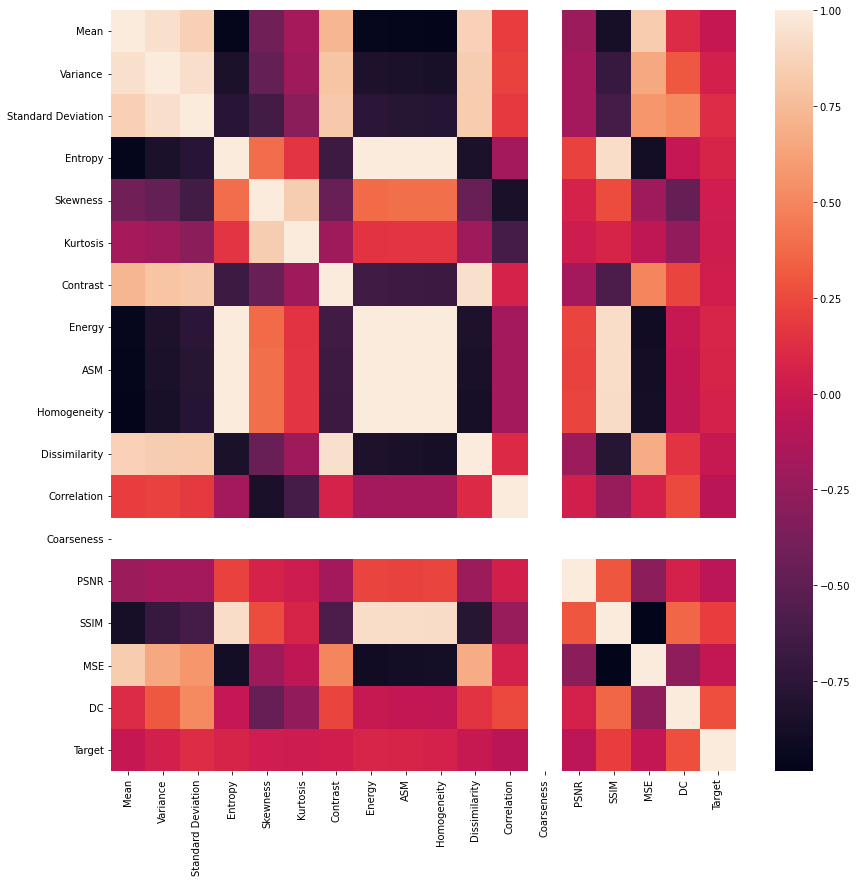

In [ ]:
# making a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr)


In [ ]:
import cv2
x=[]
y=[]


In [ ]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as pl

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Braintumor/Brain Tumor/',  target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 0 images belonging to 0 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Braintumor/Brain Tumor', target_size = (64, 64),                batch_size = 32, class_mode = 'binary')

Found 0 images belonging to 0 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



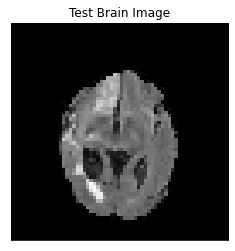

brain tumor present


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/Braintumor/Brain Tumor/Image1196.jpg', target_size = (64, 64))
plt.imshow(test_image)
plt.title('Test Brain Image'), plt.xticks([]), plt.yticks([])
plt.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'brain tumor present'
else:
    prediction = 'no brain tumor'
print(prediction)

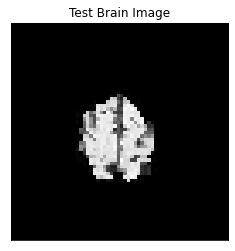

brain tumor present


In [ ]:
test_image = image.load_img('/content/drive/MyDrive/Braintumor/Brain Tumor/Image1190.jpg', target_size = (64, 64))
plt.imshow(test_image)
plt.title('Test Brain Image'), plt.xticks([]), plt.yticks([])
plt.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'brain tumor present'
else:
    prediction = 'no brain tumor'
print(prediction)